# HW 1 - Luis Angel Campero García A01019685

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# I. Implementing classifiers - Understanding Decision Boundaries

In [2]:
from sklearn. linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

boundaries = pd.read_csv('01-boundaries.csv')

boundaries['color_1'] = boundaries['y'].apply(
    lambda x: 'darkorange' if x == 1 else 'lime'
)
boundaries['color_2'] = boundaries['y'].apply(
    lambda x: 'gold' if x == 1 else 'seagreen'
)

X = boundaries[['x1', 'x2']].values
y = boundaries['y'].values
boundaries.head()

,x1,x2,y,color_1,color_2
0,0.336494,-0.985951,0.0,lime,seagreen
1,-0.011043,-0.105529,1.0,darkorange,gold
2,0.238160,-0.617417,1.0,darkorange,gold
3,-0.366783,-0.713819,1.0,darkorange,gold
4,1.221923,-1.039399,0.0,lime,seagreen


## Helper function to plot and predict easily

In [3]:
def fit_and_plot_model(X, y, model):
    '''
    X: feature matrix
    y: label matrix
    model: sci-kit learn model to create predictions
    '''
    
    model.fit(X, y)
    
    min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1
    min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1

    x1_grid = np.arange(min1, max1, 0.1)
    x2_grid = np.arange(min2, max2, 0.1)

    xx, yy = np.meshgrid(x1_grid, x2_grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))

    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, colors=boundaries['color_1'])
    
    plt.scatter(X[:, 0], X[:, 1], c=boundaries['color_2'])

## Logistic Regression

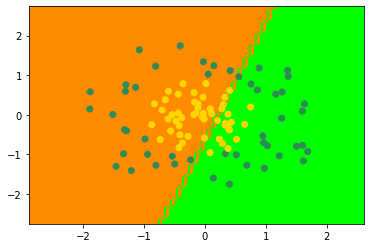

In [4]:
lr = LogisticRegression()
fit_and_plot_model(X, y, lr)

## Decision Trees

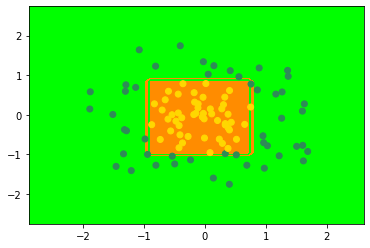

In [5]:
tree = DecisionTreeClassifier()
fit_and_plot_model(X, y, tree)

## SVMs

### rbf kernel

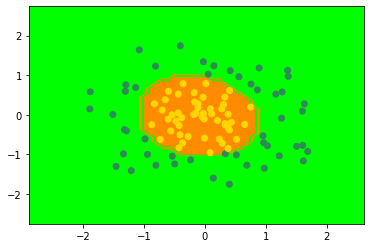

In [6]:
svm_rbf = SVC(kernel='rbf')
fit_and_plot_model(X, y, svm_rbf)

### linear kernel

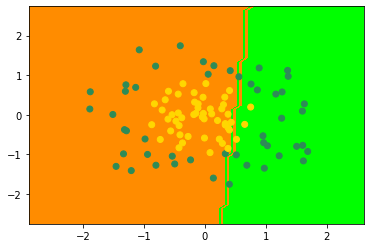

In [7]:
svm_linear = SVC(kernel='linear')
fit_and_plot_model(X, y, svm_linear)

## MLP

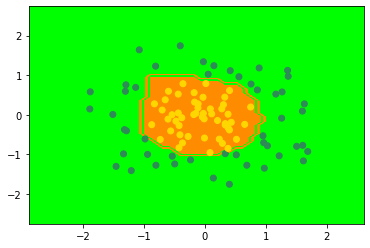

In [8]:
mlp = MLPClassifier(hidden_layer_sizes= (10, 10, 10, 10), max_iter=1000)
fit_and_plot_model(X, y, mlp)

## Interpretation

What are the shapes of the decision boundaries of diferent classifiers? Do all of them have the same shape? If not, why are the shapes of the decision boundaries different?


Depending on the intrinsic characteristics of each classifier, the decision boundary varies in shape. The decision trees, the SVM with an rbf kernel, and the neural network can learn non-linear representations of the data and, therefore, can separate the central class correctly. However, the logistic regression and the SVM with the linear kernel can only learn linear functions, and in consequence cannot separate the two classes in the problem.

# II. How a clustering algorithm works

## Part 1: Using Scikit-Learn

In this section, the scikit-learn implementation of KMeans Clustering is used on the mouse dataset.

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

rows = []
# Load the data in the weird format
with open('01-mouse.csv') as file:
    for line in file:
        if '#' not in line:
            rows.append(line.strip('\n').split(' '))

# Transform the list of lists into a pandas DataFrame
mouse = pd.DataFrame(rows)
mouse.rename(columns={
    0: 'x1',
    1: 'x2',
    2: 'y'
}, inplace=True)

# Change the datatype
mouse['x1'] = mouse['x1'].astype(float)
mouse['x2'] = mouse['x2'].astype(float)

# Encode the labels
le = LabelEncoder()
mouse['y_encoded'] = le.fit_transform(mouse['y'])
mouse

,x1,x2,y,y_encoded
0,0.456601,0.432806,Head,2
1,0.611378,0.528625,Head,2
2,0.450299,0.711606,Head,2
3,0.639015,0.460744,Head,2
4,0.628957,0.323470,Head,2
...,...,...,...,...
485,0.824842,0.713416,Ear_right,1
486,0.823959,0.767519,Ear_right,1
487,0.815515,0.713517,Ear_right,1
488,0.785691,0.681914,Ear_right,1


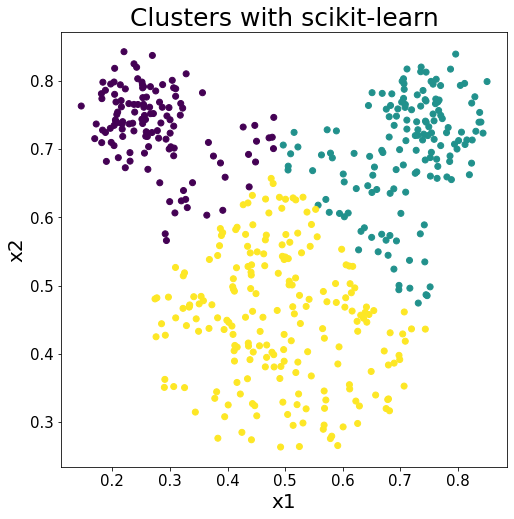

In [10]:
# Fit and visualize with Scikit-learn
model = KMeans(n_clusters = 3)
mouse['clusters'] = model.fit_predict(mouse[['x1', 'x2']])


plt.figure(figsize=(8,8))
plt.title('Clusters with scikit-learn', size=25)
plt.xlabel('x1', size=20)
plt.ylabel('x2', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.scatter(mouse['x1'], mouse['x2'], c=mouse['clusters'])
plt.show()

## Part 2: K-Means from zero

In this section, an implementation from zero of the KMeans algorithm is presented and tested on the mouse dataset.

The results obtained with the custom implementation are the same as the ones obtained with Scikit-learn.

In [11]:
class KMeansCamperock:
    def __init__(self, n_clusters=3, max_iter=3000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit_transform(self, x):
        x = np.array(x)
        x_length = len(x)
        
        # Select n_clusters random points to be centroids
        centroids = np.array(
            [x[random.randint(0, 490)] for i in range(self.n_clusters)]
        )
        centroids_equal = False
        
        iters = 0
        # Iterate until convergence
        while not centroids_equal or iters == self.max_iter:
            centroids_copy = centroids.copy()
            
            # How far is each point to each centroid
            diffs = np.zeros((len(x), self.n_clusters))
            for i, centroid in enumerate(centroids):
                sqrt_diff = np.sqrt( np.sum( (centroid-x) ** 2, axis=1) )
                diffs[:, i] = sqrt_diff
            # Select the closest cluster for each point
            clusters = np.argmin(diffs, axis=1)

            # Select the points in each cluster and average them
            for i in set(clusters):
                indices = np.where(clusters == i)[0]
                cluster_data = x[indices]
                cluster_avg = np.mean(cluster_data, axis = 0)
                # Update cluster centroid
                centroids[i] = cluster_avg
            centroids_equal = np.array_equal(centroids_copy, centroids)
            iters += 1
        return clusters

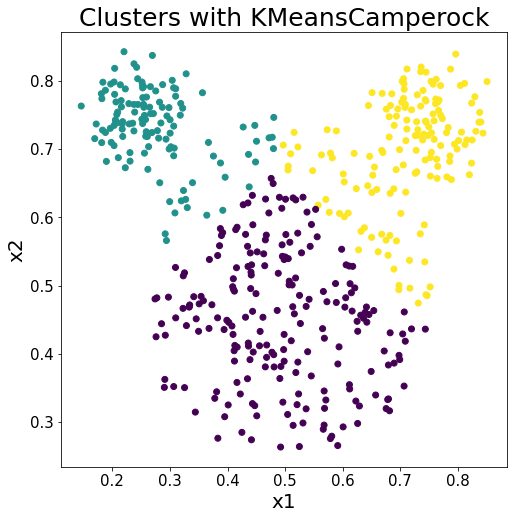

In [12]:
# Fit and visualize with custom implementation of the algorithm
model_camperock = KMeansCamperock(3)
mouse['camperock_clusters'] = model_camperock.fit_transform( mouse[['x1', 'x2']] )

plt.figure(figsize=(8,8))
plt.title('Clusters with KMeansCamperock', size=25)
plt.xlabel('x1', size=20)
plt.ylabel('x2', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.scatter(mouse['x1'], mouse['x2'], c=mouse['camperock_clusters'])
plt.show()